In [1]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [8]:
#Building a Feed forward network
model = nn.Sequential(nn.Linear(784,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10))

# Defining the loss
criterion = nn.CrossEntropyLoss()

#Get our data
images, labels = next(iter(trainloader))
print(images.shape)
#Flatten images
images = images.view(images.shape[0], -1)
print(images.shape)
#Forward pass, get out logits
logits = model(images)
print(logits.shape)
print(logits[3])
print(labels.shape)
print(labels[3])
#Calculate the loss with the logits and labels
loss = criterion(logits, labels)
print(loss)

torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
torch.Size([64, 10])
tensor([-0.0475, -0.1505, -0.1194, -0.0546,  0.1218, -0.0130,  0.1956,  0.1912,
        -0.1198,  0.0043], grad_fn=<SelectBackward>)
torch.Size([64])
tensor(7)
tensor(2.3083, grad_fn=<NllLossBackward>)


# My Model with softmax output and calculate loss with negative log likelihood loss

In [7]:
my_model = nn.Sequential(nn.Linear(784,128),
                         nn.ReLU(),
                         nn.Linear(128,64),
                         nn.ReLU(),
                         nn.Linear(64,10),
                         nn.LogSoftmax(dim =1))

#Define the loss
calculate_loss =  nn.NLLLoss()
#Getting data
images, labels = next(iter(trainloader))
#Flatten the images
images = images.view(images.shape[0], -1)
#Forward pass, get output with log-softmax
logits_2  = my_model(images)
print(logits_2.shape)
print(logits_2[2])
# Calculating the loss using log likelihood loss function
loss_2 = calculate_loss(logits_2, labels)
print(loss_2)

torch.Size([64, 10])
tensor([-2.4237, -2.2963, -2.3095, -2.2999, -2.2693, -2.2493, -2.2412, -2.2660,
        -2.3069, -2.3784], grad_fn=<SelectBackward>)
tensor(2.3043, grad_fn=<NllLossBackward>)


**Autograd**

In [16]:
x = torch.zeros(1, requires_grad = True)
with torch.no_grad():
    y = x*2
print(y)
y.requires_grad

tensor([0.])


False

Also, you can turn on or off gradients altogether with torch.set_grad_enabled(True|False).
The gradients are computed with respect to some variable z with z.backward(). This does a backward pass through the operations that created z.

In [18]:
x = torch.randn(2,2, requires_grad = True)
print(x)
x.requires_grad

tensor([[-0.6172,  0.0769],
        [ 0.2620,  0.4664]], requires_grad=True)


True

In [20]:
y = x**2
print(y)
y.requires_grad

tensor([[0.3810, 0.0059],
        [0.0686, 0.2175]], grad_fn=<PowBackward0>)


True

In [21]:
z = y.mean()
print(z)

tensor(0.1683, grad_fn=<MeanBackward0>)


In [22]:
print(x.grad)
print(y.grad)

None
None


<ipython-input-22-cd4c40187c02>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  print(y.grad)


In [23]:
z.backward()
print(x.grad)
print(x/2)

tensor([[-0.3086,  0.0385],
        [ 0.1310,  0.2332]])
tensor([[-0.3086,  0.0385],
        [ 0.1310,  0.2332]], grad_fn=<DivBackward0>)


In [31]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

In [32]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-3.5889e-04, -3.5889e-04, -3.5889e-04,  ..., -3.5889e-04,
         -3.5889e-04, -3.5889e-04],
        [-2.1071e-03, -2.1071e-03, -2.1071e-03,  ..., -2.1071e-03,
         -2.1071e-03, -2.1071e-03],
        [ 2.9162e-03,  2.9162e-03,  2.9162e-03,  ...,  2.9162e-03,
          2.9162e-03,  2.9162e-03],
        ...,
        [-3.6813e-03, -3.6813e-03, -3.6813e-03,  ..., -3.6813e-03,
         -3.6813e-03, -3.6813e-03],
        [ 3.5215e-03,  3.5215e-03,  3.5215e-03,  ...,  3.5215e-03,
          3.5215e-03,  3.5215e-03],
        [-3.2476e-05, -3.2476e-05, -3.2476e-05,  ..., -3.2476e-05,
         -3.2476e-05, -3.2476e-05]])


In [33]:
from torch import optim
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [40]:
print('Initial weights: ', model[0].weight)
images, labels = next(iter(trainloader))
images.resize_(64,784)
#print(images[1].shape)
# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()
# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
print('Loss: ', loss)
loss.backward()
print('Gradient: ', model[0].weight.grad)

Initial weights:  Parameter containing:
tensor([[ 3.0601e-02, -1.2803e-02,  2.4131e-03,  ..., -2.7497e-02,
         -3.3211e-05,  2.9672e-03],
        [ 2.9511e-02,  2.5504e-02, -2.3023e-02,  ..., -2.4637e-02,
         -2.3107e-02,  3.2171e-02],
        [ 2.4239e-02, -2.2799e-02, -8.2576e-03,  ...,  1.9451e-02,
          2.5680e-02, -2.3160e-02],
        ...,
        [-2.8293e-02, -2.6967e-02, -2.1232e-02,  ...,  9.1056e-03,
          2.2899e-02,  1.4649e-03],
        [ 9.1891e-03, -2.9866e-02, -3.2119e-02,  ..., -2.2340e-02,
         -1.7779e-02,  1.0249e-02],
        [-3.1128e-02, -1.2170e-02,  1.4823e-02,  ...,  1.8353e-02,
          2.9773e-02,  1.4765e-02]], requires_grad=True)
Loss:  tensor(2.3262, grad_fn=<NllLossBackward>)
Gradient:  tensor([[ 0.0028,  0.0028,  0.0028,  ...,  0.0028,  0.0028,  0.0028],
        [ 0.0040,  0.0040,  0.0040,  ...,  0.0040,  0.0040,  0.0040],
        [ 0.0021,  0.0021,  0.0021,  ...,  0.0021,  0.0021,  0.0021],
        ...,
        [ 0.0006,  0.0006

In [41]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights: ', model[0].weight)

Updated weights:  Parameter containing:
tensor([[ 3.0572e-02, -1.2831e-02,  2.3847e-03,  ..., -2.7525e-02,
         -6.1573e-05,  2.9389e-03],
        [ 2.9470e-02,  2.5464e-02, -2.3063e-02,  ..., -2.4678e-02,
         -2.3147e-02,  3.2131e-02],
        [ 2.4218e-02, -2.2820e-02, -8.2788e-03,  ...,  1.9430e-02,
          2.5659e-02, -2.3181e-02],
        ...,
        [-2.8299e-02, -2.6973e-02, -2.1237e-02,  ...,  9.1000e-03,
          2.2893e-02,  1.4592e-03],
        [ 9.1707e-03, -2.9885e-02, -3.2138e-02,  ..., -2.2359e-02,
         -1.7797e-02,  1.0230e-02],
        [-3.1109e-02, -1.2151e-02,  1.4842e-02,  ...,  1.8372e-02,
          2.9792e-02,  1.4783e-02]], requires_grad=True)


In [45]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        #Flatten MNIST images into a 784 vector
        images = images.view(images.shape[0], -1)
        #Training pass
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print('Training loss: ', running_loss/len(trainloader))
        

Training loss:  1.9194586048248226
Training loss:  0.8813012041834626
Training loss:  0.5401082318951326
Training loss:  0.4375562591752264
Training loss:  0.39022570665774825


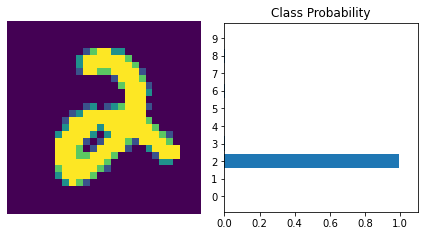

In [47]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[12].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)